In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [384]:
df=pd.read_csv("./bank-data/bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [385]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [386]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [387]:
df_num = df.select_dtypes(include = ['int64'])
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


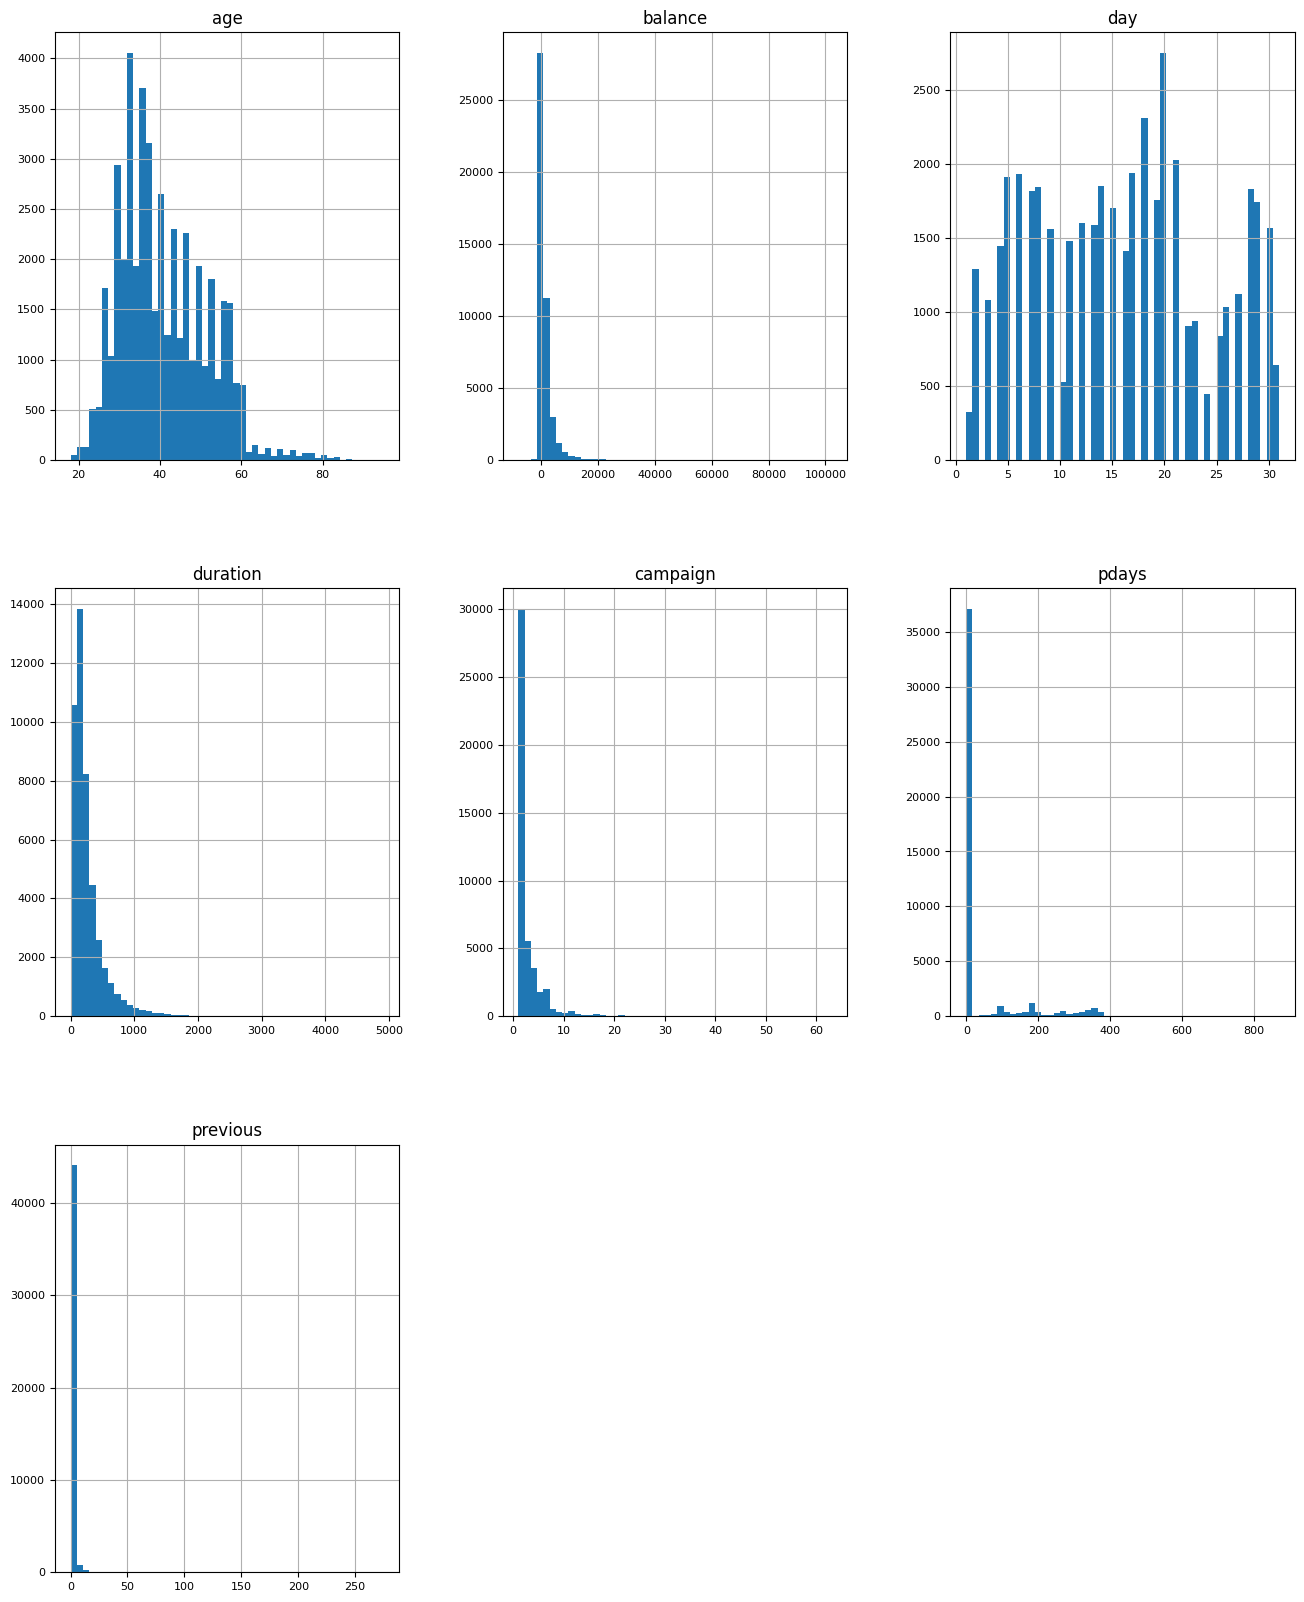

In [388]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

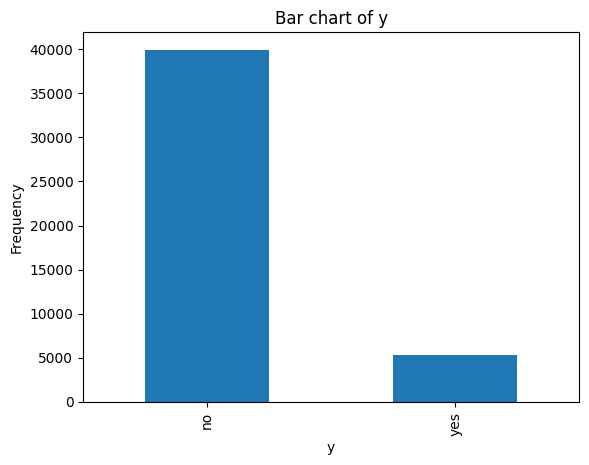

In [389]:

df['y'].value_counts().plot(kind='bar')
plt.title('Bar chart of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()


In [390]:
x_freq={}

In [391]:
def plot_bar(column):
  val=df[column].value_counts()
  x_freq[column]=len(val)
  if len(val) > 10:
    val[:10].plot(kind='bar')
  else:
    val.plot(kind='bar')
  plt.title('Bar chart of ' + column)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


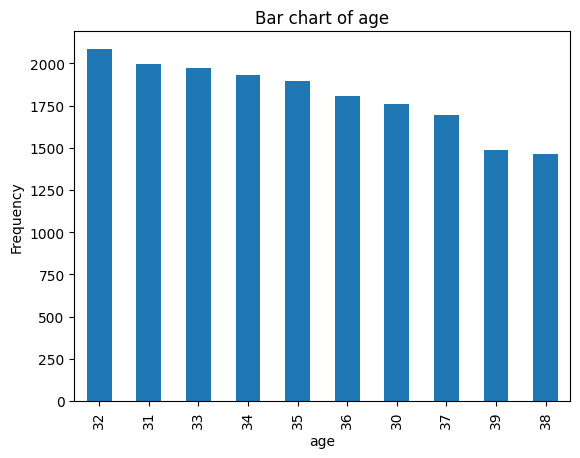

age


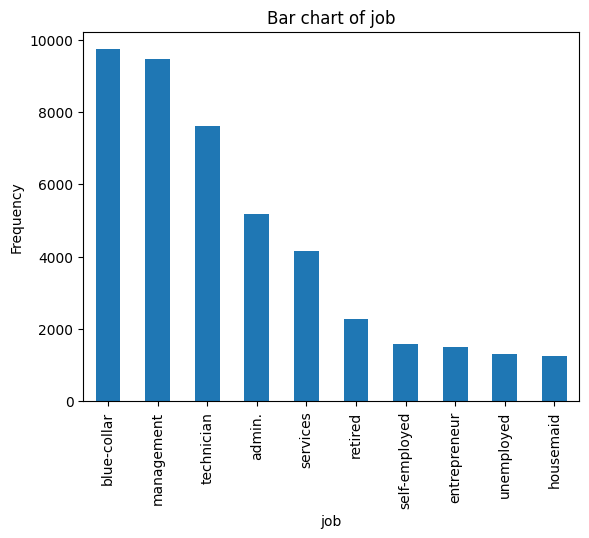

job


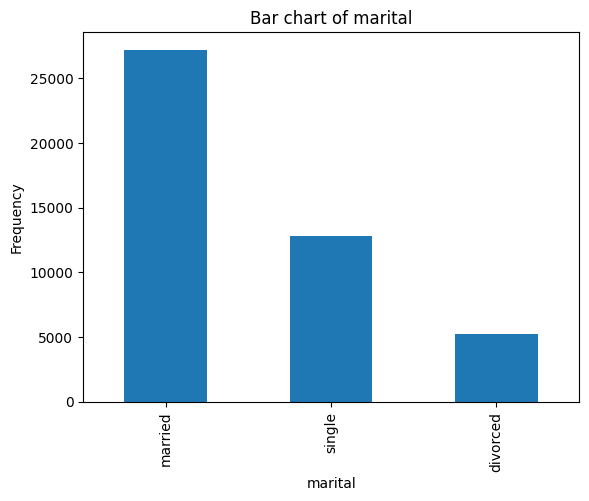

marital


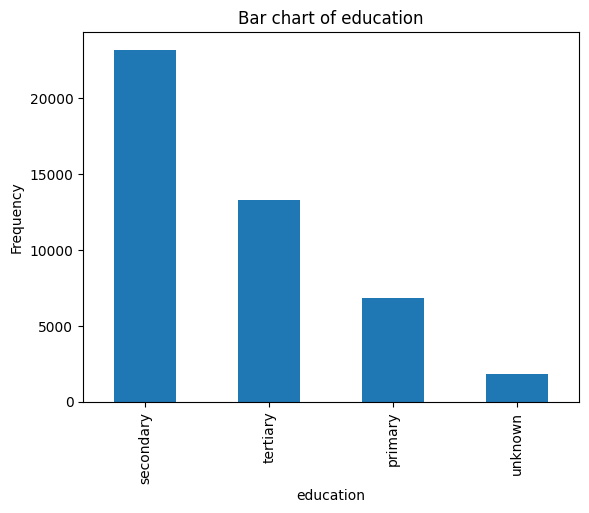

education


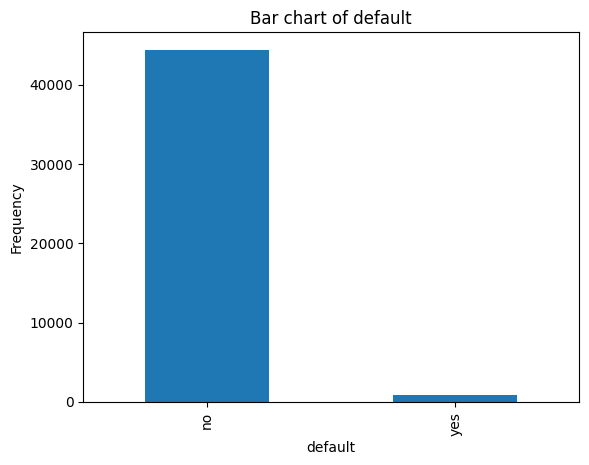

default


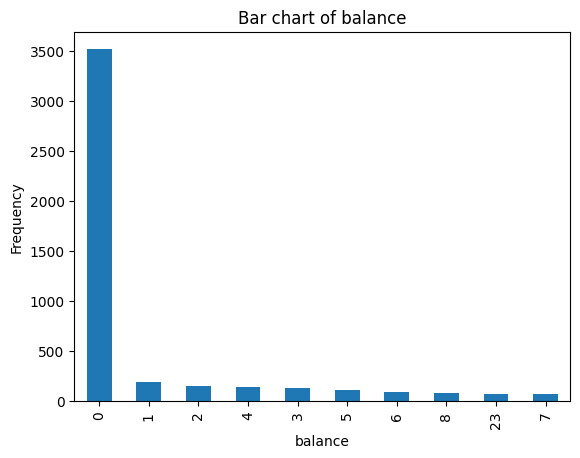

balance


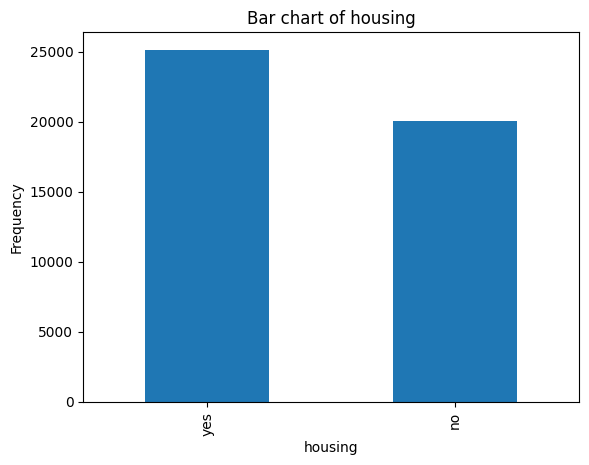

housing


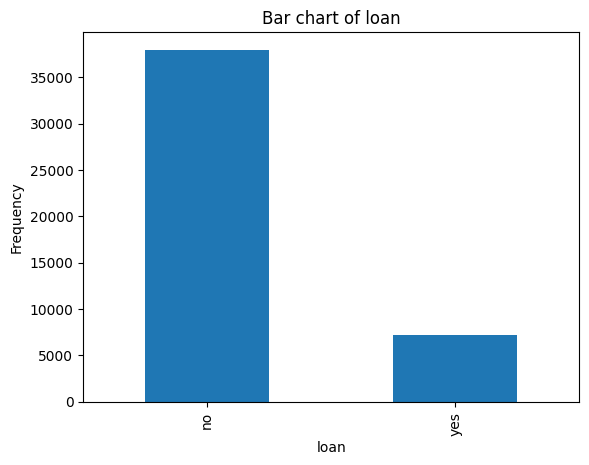

loan


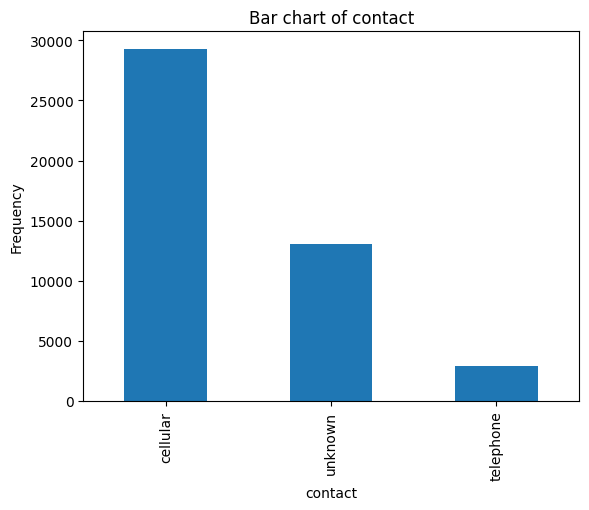

contact


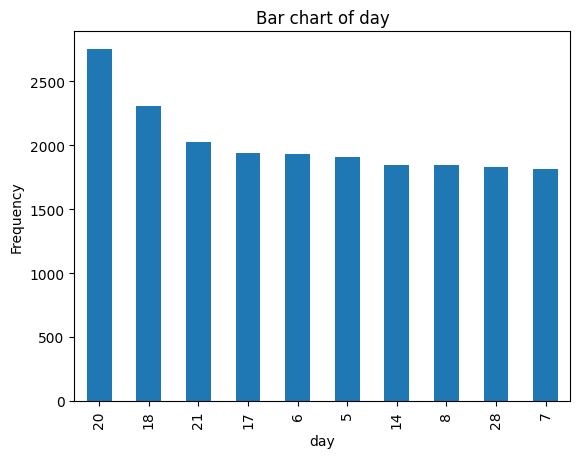

day


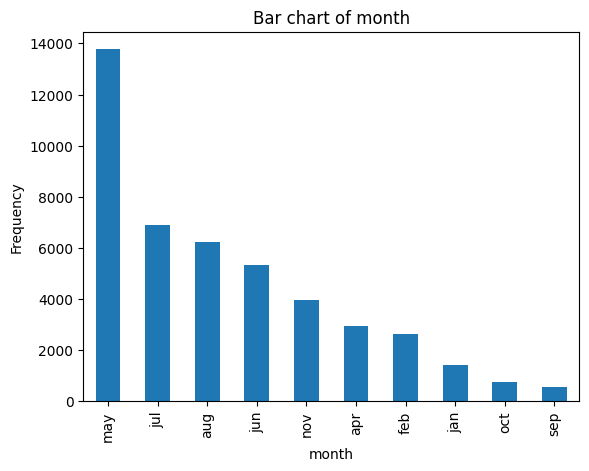

month


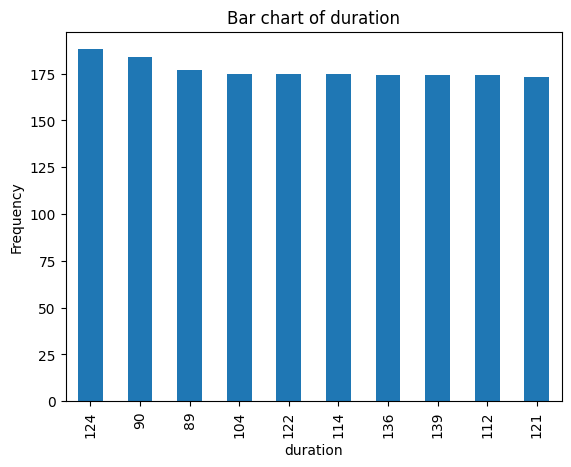

duration


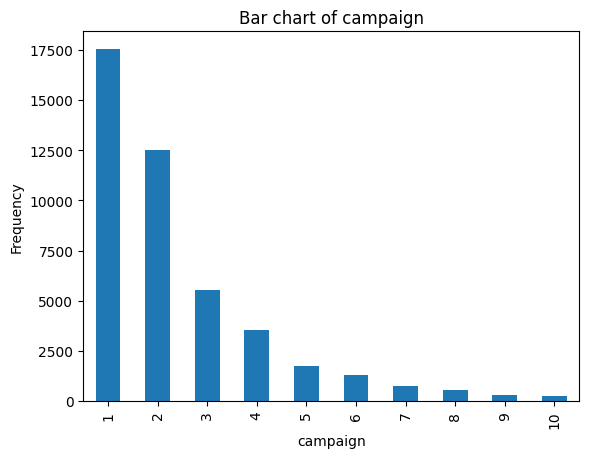

campaign


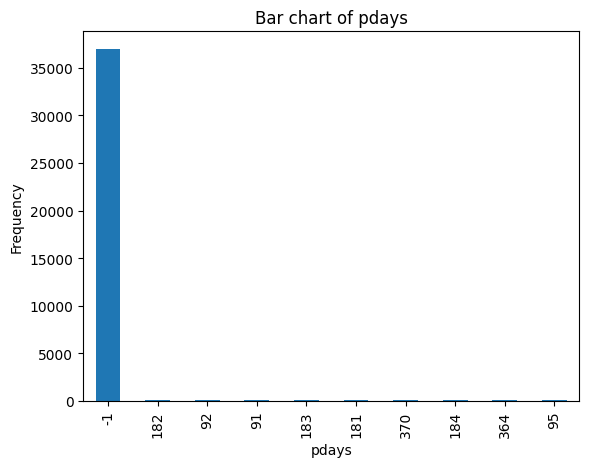

pdays


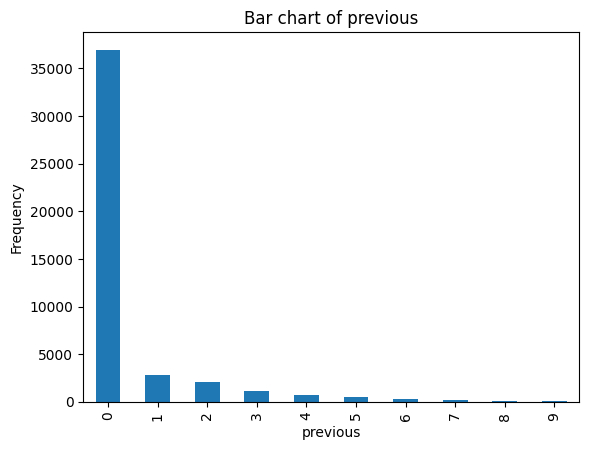

previous


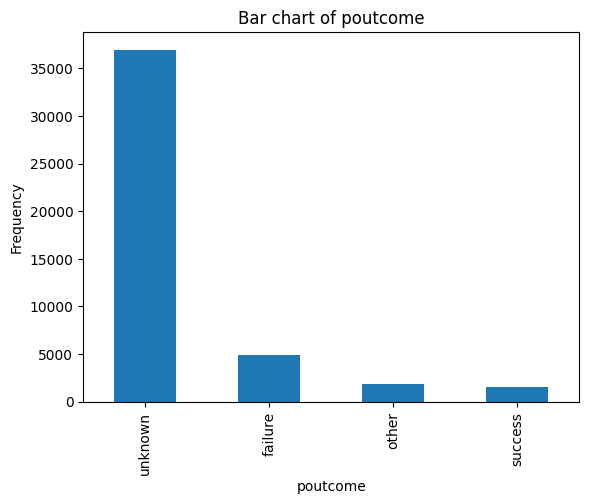

poutcome


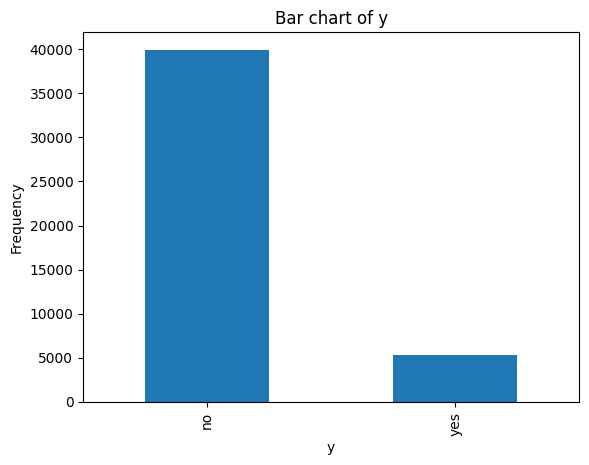

y


In [392]:
for i in df.columns:
  plot_bar(i)
  print(i)

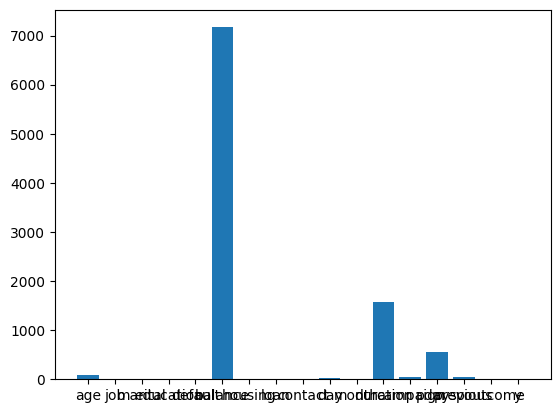

In [393]:
# print(x_freq)
# plot x_freq bar chart wide format

plt.bar(range(len(x_freq)), list(x_freq.values()), align='center')
plt.xticks(range(len(x_freq)), list(x_freq.keys()))
plt.show()


In [394]:
print(x_freq)

{'age': 77, 'job': 12, 'marital': 3, 'education': 4, 'default': 2, 'balance': 7168, 'housing': 2, 'loan': 2, 'contact': 3, 'day': 31, 'month': 12, 'duration': 1573, 'campaign': 48, 'pdays': 559, 'previous': 41, 'poutcome': 4, 'y': 2}


In [395]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [396]:
# corelation with y
# df.corr()['y'].sort_values()

In [397]:
df=df.drop(['contact','month',"default",'poutcome'],axis=1)

In [398]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [399]:
# convert categorical to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

df.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,4,1,2,2143,1,0,5,261,1,-1,0,0
1,44,9,2,1,29,1,0,5,151,1,-1,0,0
2,33,2,1,1,2,1,1,5,76,1,-1,0,0
3,47,1,1,3,1506,1,0,5,92,1,-1,0,0
4,33,11,2,3,1,0,0,5,198,1,-1,0,0


In [400]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=df['y']
df=df.drop(['y'],axis=1)
for i in df.columns:
  if i != 'y':
    df[i]=scaler.fit_transform(df[i].values.reshape(-1,1))
df['y']=y
df.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.893915,-0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,0.893915,-0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,0.893915,2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,0.893915,-0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-1.118674,-0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0


In [401]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

X_train, X_val = split_dataset(df)

y_train=X_train.iloc[:,-1]
X_train=X_train.iloc[:,:-1]
print(y_train)
y_val=X_val.iloc[:,-1]
X_val=X_val.iloc[:,:-1]
print(y_val)
print(f"training: {len(X_train)} testing: {len(X_val)}")

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 31573, dtype: int32
5        0
10       0
13       0
15       0
17       0
        ..
45189    0
45191    1
45194    0
45196    1
45201    1
Name: y, Length: 13638, dtype: int32
training: 31573 testing: 13638


In [415]:
X_train.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.893915,-0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,0.893915,-0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,0.893915,2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,0.893915,-0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-1.118674,-0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


In [416]:
df.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.893915,-0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,0.893915,-0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,0.893915,2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,0.893915,-0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-1.118674,-0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0


In [417]:
X_train.shape,X_val.shape

((31573, 12), (13638, 12))

In [403]:
# show the correlation between y and other variables

# for i in df.columns:
#   if i != 'y':
#     print(i)
#     print(df[i].corr(df['y']))
    

In [404]:
type(y_val)

pandas.core.series.Series

In [421]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_val,y_val)

0.8903064965537468

In [422]:
model.coef_

array([[ 0.05278395,  0.04110869,  0.11353103,  0.15682168,  0.07388092,
        -0.57468972, -0.25108235, -0.02559651,  0.99879574, -0.42993673,
         0.30434293,  0.1727928 ]])

In [413]:
y_pred=model.predict(X_val)

In [407]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [418]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        elif y_actual[i]==y_pred[i]==0:
           TN += 1
        elif y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        elif y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return{"TP": TP, "FP": FP, "TN": TN, "FN": FN}

In [419]:
cm=perf_measure(y_val.to_numpy() ,y_pred)
cm

{'TP': 312, 'FP': 207, 'TN': 11830, 'FN': 1289}

In [410]:
def print_metrics(cm):
  print("accuracy: ", (cm["TP"] + cm["TN"]) / (cm["TP"] + cm["TN"] + cm["FP"] + cm["FN"]))
  print("precision: ", cm["TP"] / (cm["TP"] + cm["FP"]))
  print("recall: ", cm["TP"] / (cm["TP"] + cm["FN"]))
  print("specificity: ", cm["TN"] / (cm["TN"] + cm["FP"]))
  print("f1 score: ", 2 * cm["TP"] / (2 * cm["TP"] + cm["FP"] + cm["FN"]))
print_metrics(cm)

accuracy:  0.8903064965537468
precision:  0.6011560693641619
recall:  0.19487820112429732
specificity:  0.9828030240093046
f1 score:  0.2943396226415094


<Axes: >

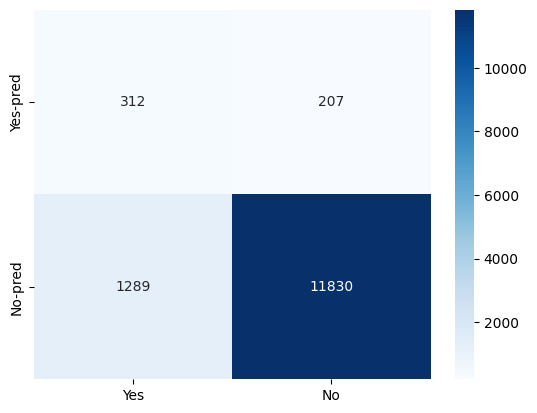

In [411]:
import seaborn as sns

sns.heatmap([[cm["TP"], cm["FP"]], [cm["FN"], cm["TN"]]], annot=True, fmt="d", cmap="Blues", xticklabels=["Yes", "No"], yticklabels=["Yes-pred", "No-pred"])